In [79]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Der Pfad der Projektdatei Mask_CNN
ROOT_DIR = os.path.abspath("C:/Users/majd4/Desktop/Bachelorarbeit/Bachelor-Arbeit-Daten/MaskRCNNProjekt/MaskRCNN_2/Mask_RCNN")
# In Sytsem Bibliothek hinzufügen 
sys.path.append(ROOT_DIR)  
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from samples.Tipvortexcavitation import Tipvortexcavitation
%matplotlib inline 
# Die Datei für die logs angeben 
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [80]:
config = Tipvortexcavitation.TipvortexcavitationConfig()
Tipvortexcavitation_DIR = os.path.join(ROOT_DIR, "datasets/Tipvortexcavitation")

In [81]:
# config wird die Funktionsweise der TipvortexcavitationConfig funktion übernommen und 
# einpaar werte überschrieben 
class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.02
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE           

In [82]:
DEVICE = "/cpu:0"   
TEST_MODE = "inference"

In [83]:
def get_ax(rows=1, cols=1, size=16):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [84]:
dataset = Tipvortexcavitation.TipvortexcavitationDataset()
dataset.load_Tipvortexcavitation(Tipvortexcavitation_DIR, "val")
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 14
Classes: ['BG', 'Tipvortexcavitation']


In [85]:
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [86]:
model.keras_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [87]:
#weights_path = model.find_last()
weights_path = "C:/Users/majd4/Desktop/Bachelorarbeit/Bachelor-Arbeit-Daten/MaskRCNNProjekt/MaskRCNN_2/Mask_RCNN/Tipvortex2.h5"
# Gewichte Laden 
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)


Loading weights  C:/Users/majd4/Desktop/Bachelorarbeit/Bachelor-Arbeit-Daten/MaskRCNNProjekt/MaskRCNN_2/Mask_RCNN/Tipvortex2.h5


image ID: Tipvortexcavitation.Stb Gesamt0001 13-09-27 10-41-00-2 10.jpg (11) C:\Users\majd4\Desktop\Bachelorarbeit\Bachelor-Arbeit-Daten\MaskRCNNProjekt\MaskRCNN_2\Mask_RCNN\datasets/Tipvortexcavitation\val\Stb Gesamt0001 13-09-27 10-41-00-2 10.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (3,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (3, 4)                min:    3.00000  max:  838.00000  int32
gt_mask                  shape: (1024, 1024, 3)       min:    0.00000  max:    1.00000  bool


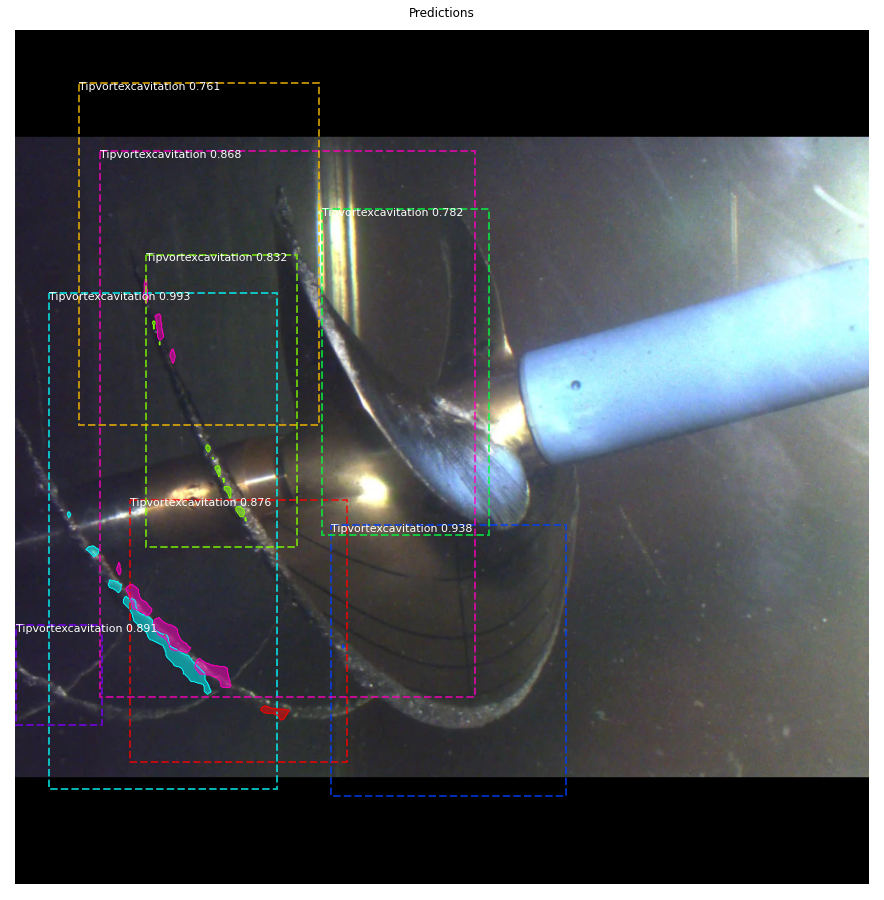

In [88]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Objekterkennung ausführen
results = model.detect([image], verbose=1)
# Ergebnisse anzeigen
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

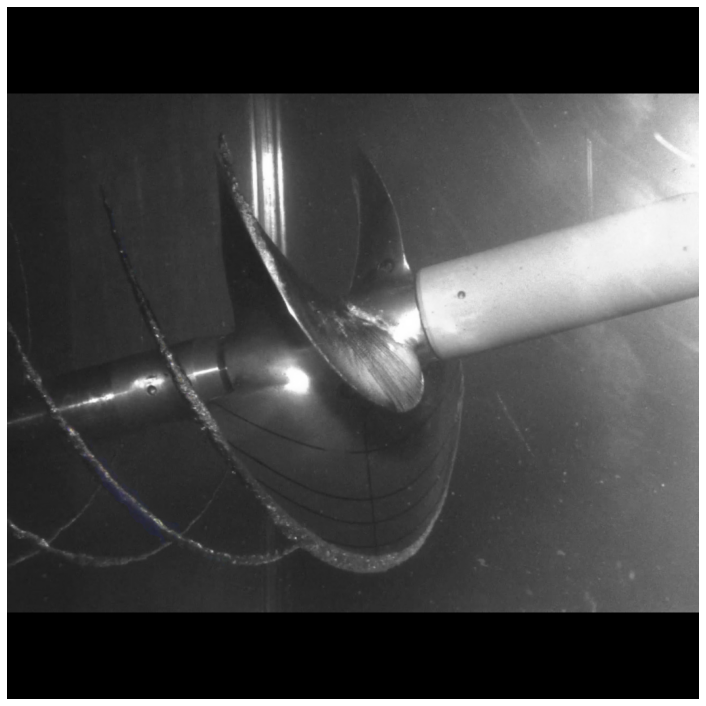

In [89]:
splash = Tipvortexcavitation.color_splash(image, r['masks'])
display_images([splash], cols=1)

In [90]:
# Region Prposal Network Schlägt Regionen vor, wo das gewollte oder erkannte Objekt zu sehen ist 
# Dieses Mathching, das bedeutet,  das Muster wird gefunden und wird eine Quadrate darüber gezeichnet 
# Positive anchor 1, -1 das Mactching wird nicht gefunden
# and 0 for neutral anchors. die Bounding boxs werden nach dem Muster durchgesucht
# werden klassifiziert nach postiv anker 1, negitiver anker -1, neutral anker 0
target_rpn_match, target_rpn_bbox = modellib.build_rpn_targets(
    image.shape, model.anchors, gt_class_id, gt_bbox, model.config)
log("target_rpn_match", target_rpn_match)
log("target_rpn_bbox", target_rpn_bbox)
positive_anchor_ix = np.where(target_rpn_match[:] == 1)[0]
negative_anchor_ix = np.where(target_rpn_match[:] == -1)[0]
neutral_anchor_ix = np.where(target_rpn_match[:] == 0)[0]
positive_anchors = model.anchors[positive_anchor_ix]
negative_anchors = model.anchors[negative_anchor_ix]
neutral_anchors = model.anchors[neutral_anchor_ix]
log("positive_anchors", positive_anchors)
log("negative_anchors", negative_anchors)
log("neutral anchors", neutral_anchors)

# Wenden Sie Verfeinerungsdeltas auf positive Anker an 
refined_anchors = utils.apply_box_deltas(
    positive_anchors,
    target_rpn_bbox[:positive_anchors.shape[0]] * model.config.RPN_BBOX_STD_DEV)
log("refined_anchors", refined_anchors, )

target_rpn_match         shape: (261888,)             min:   -1.00000  max:    1.00000  int32
target_rpn_bbox          shape: (256, 4)              min:   -1.69214  max:    1.24296  float64
positive_anchors         shape: (10, 4)               min:  -64.00000  max:  960.00000  float64
negative_anchors         shape: (246, 4)              min: -181.01934  max: 1152.00000  float64
neutral anchors          shape: (261632, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (10, 4)               min:    3.00000  max:  838.00000  float32


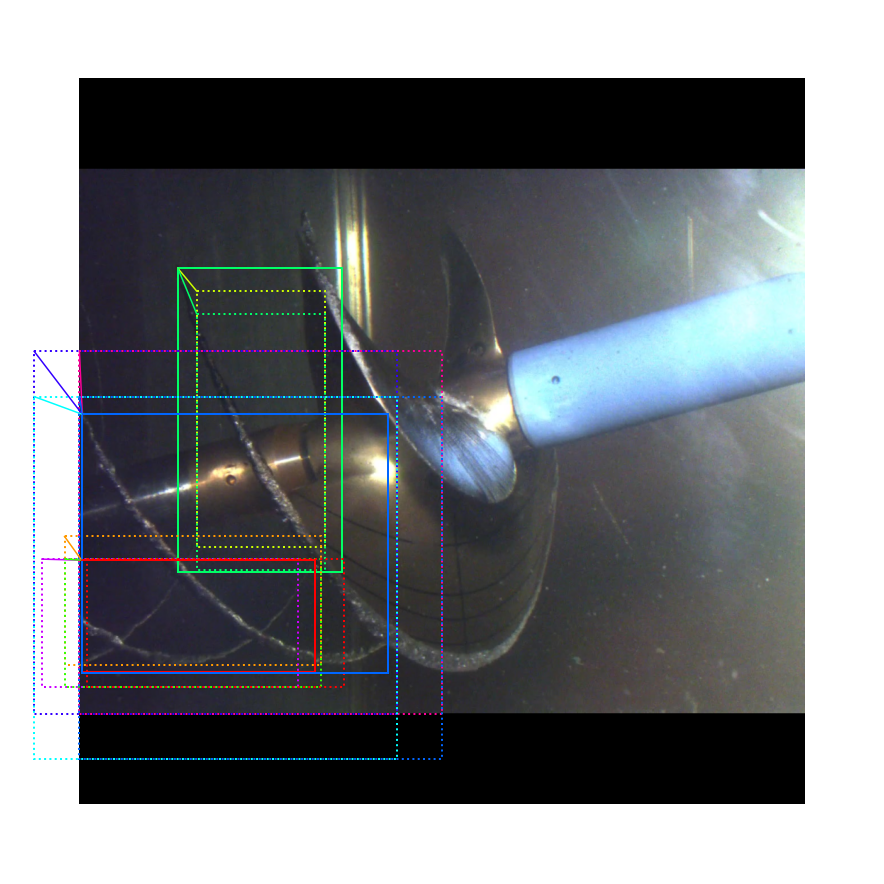

In [91]:
# Positive Anker vor der Verfeinerung anzeigen (gepunktet) und
# nach Verfeinerung
visualize.draw_boxes(image, boxes=positive_anchors, refined_boxes=refined_anchors, ax=get_ax())

In [92]:
# das RPN-Unterdiagramm ausführen 
pillar = model.keras_model.get_layer("ROI").output  # node to start searching from

# non maximum suppression
nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression:0")
if nms_node is None:
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV2:0")
if nms_node is None: #TF 1.9-1.10
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV3:0")

rpn = model.run_graph([image], [
    ("rpn_class", model.keras_model.get_layer("rpn_class").output),
    ("pre_nms_anchors", model.ancestor(pillar, "ROI/pre_nms_anchors:0")),
    ("refined_anchors", model.ancestor(pillar, "ROI/refined_anchors:0")),
    ("refined_anchors_clipped", model.ancestor(pillar, "ROI/refined_anchors_clipped:0")),
    ("post_nms_anchor_ix", nms_node),
    ("proposals", model.keras_model.get_layer("ROI").output),
])

rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000  float32
pre_nms_anchors          shape: (1, 6000, 4)          min:   -0.35390  max:    1.29134  float32
refined_anchors          shape: (1, 6000, 4)          min: -806.05688  max:  806.27625  float32
refined_anchors_clipped  shape: (1, 6000, 4)          min:    0.00000  max:    1.00000  float32
post_nms_anchor_ix       shape: (1000,)               min:    0.00000  max: 5806.00000  int32
proposals                shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32


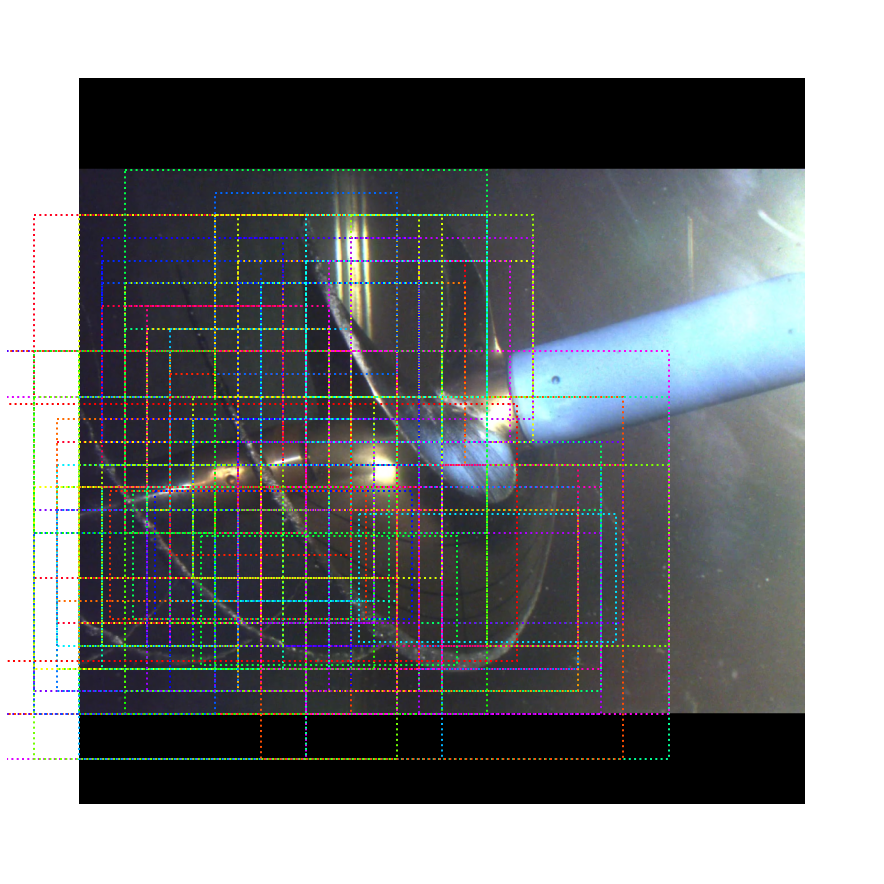

In [93]:
# Top-Anker nach Punktzahl anzeigen (vor der Verfeinerung)
limit = 100
sorted_anchor_ids = np.argsort(rpn['rpn_class'][:,:,1].flatten())[::-1]
visualize.draw_boxes(image, boxes=model.anchors[sorted_anchor_ids[:limit]], ax=get_ax())

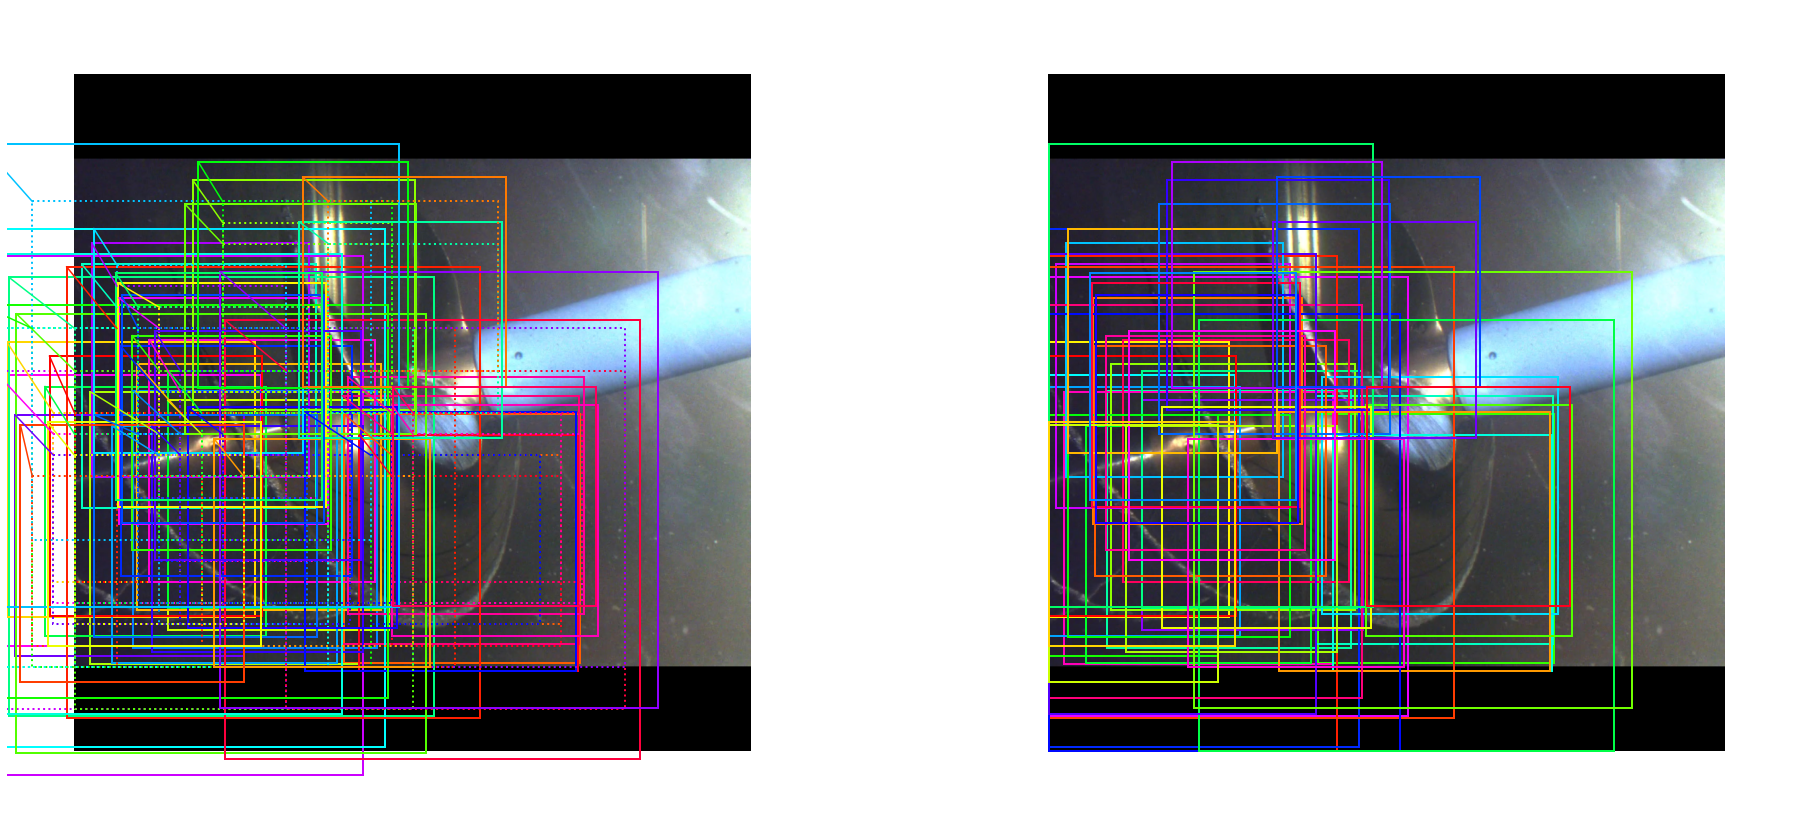

In [94]:
#Zeige Top-Anker mit Verfeinerung. Dann mit Clipping auf Bildgrenzen
limit = 50
ax = get_ax(1, 2)
pre_nms_anchors = utils.denorm_boxes(rpn["pre_nms_anchors"][0], image.shape[:2])
refined_anchors = utils.denorm_boxes(rpn["refined_anchors"][0], image.shape[:2])
refined_anchors_clipped = utils.denorm_boxes(rpn["refined_anchors_clipped"][0], image.shape[:2])
visualize.draw_boxes(image, boxes=pre_nms_anchors[:limit],
                    refined_boxes=refined_anchors[:limit], ax=ax[0])
visualize.draw_boxes(image, refined_boxes=refined_anchors_clipped[:limit], ax=ax[1])

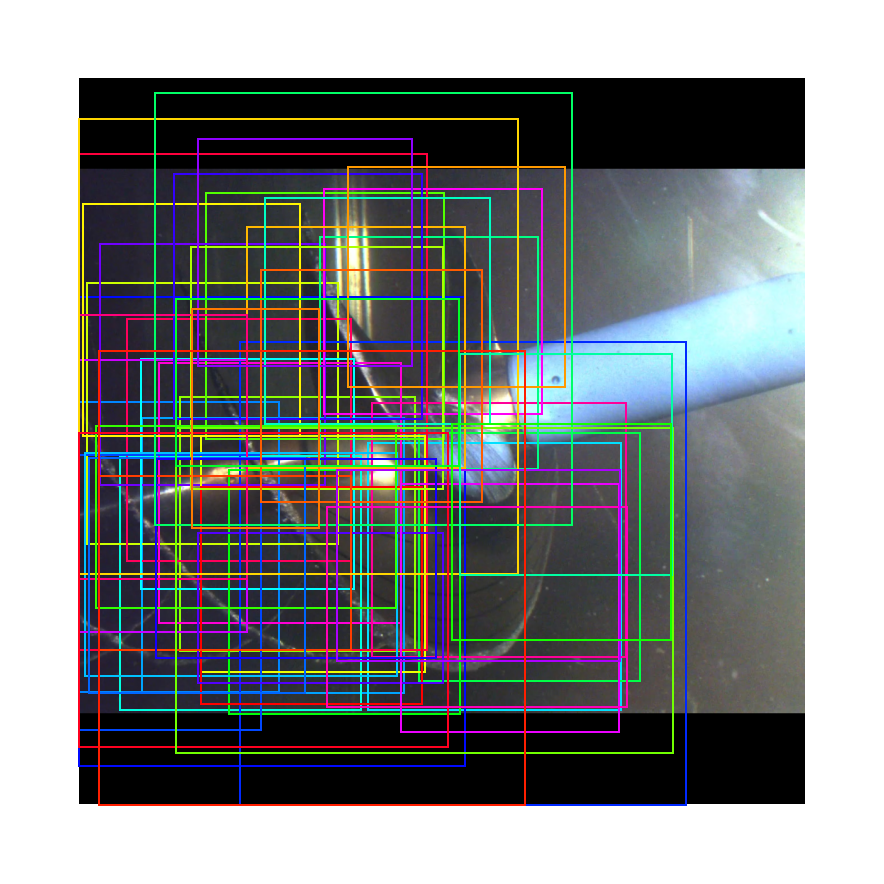

In [95]:
# Verfeinerte Anker nach nicht maximaler Unterdrückung anzeigen
limit = 50
ixs = rpn["post_nms_anchor_ix"][:limit]
visualize.draw_boxes(image, refined_boxes=refined_anchors_clipped[ixs], ax=get_ax())

In [96]:
# 
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])

proposals                shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32
probs                    shape: (1, 1000, 2)          min:    0.00000  max:    1.00000  float32
deltas                   shape: (1, 1000, 2, 4)       min:   -3.16166  max:    4.34006  float32
masks                    shape: (1, 100, 28, 28, 2)   min:    0.00001  max:    0.64014  float32
detections               shape: (1, 100, 6)           min:    0.00000  max:    1.00000  float32


8 detections: ['Tipvortexcavitation' 'Tipvortexcavitation' 'Tipvortexcavitation'
 'Tipvortexcavitation' 'Tipvortexcavitation' 'Tipvortexcavitation'
 'Tipvortexcavitation' 'Tipvortexcavitation']


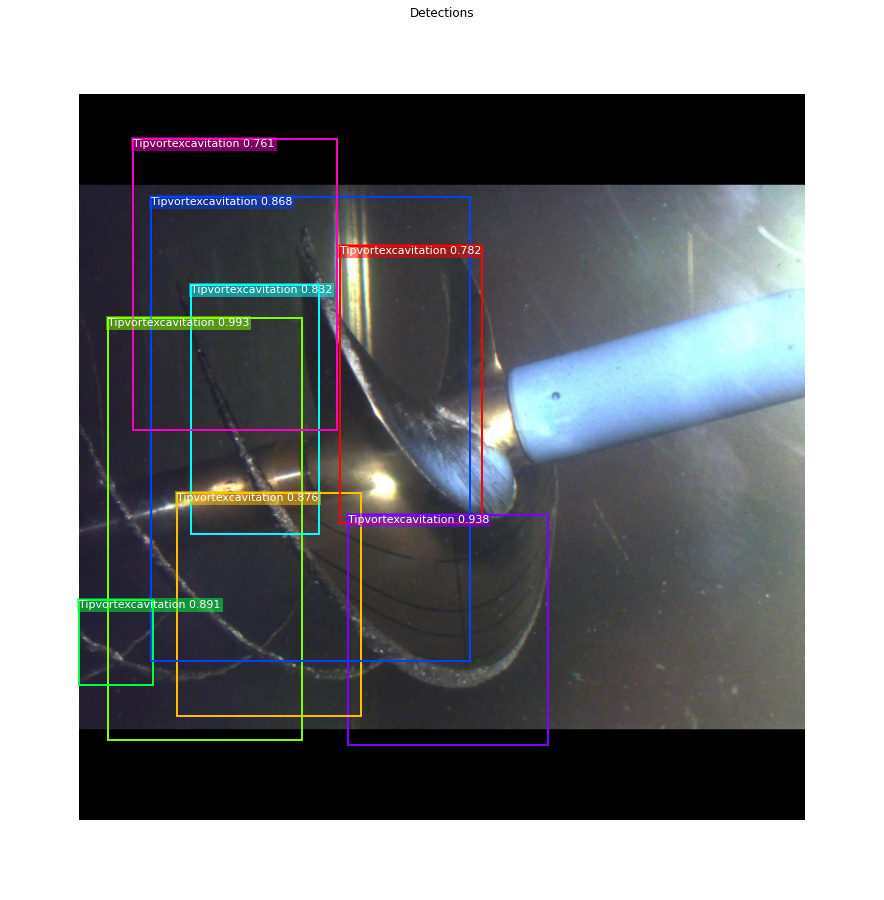

In [97]:
# 
# 
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

captions = ["{} {:.3f}".format(dataset.class_names[int(c)], s) if c > 0 else ""
            for c, s in zip(detections[:, 4], detections[:, 5])]
visualize.draw_boxes(
    image, 
    refined_boxes=utils.denorm_boxes(detections[:, :4], image.shape[:2]),
    visibilities=[2] * len(detections),
    captions=captions, title="Detections",
    ax=get_ax())

In [98]:
# Vorschläge sind normalisierte Koordinaten. Skaliere die Vorschaläge in Bildkoordinaten 
h, w = config.IMAGE_SHAPE[:2]
proposals = np.around(mrcnn["proposals"][0] * np.array([h, w, h, w])).astype(np.int32)

# Class ID, score, and mask per proposal
# Klasse ID, Ergebnis, und Maske pro Vorschlag 
roi_class_ids = np.argmax(mrcnn["probs"][0], axis=1)
roi_scores = mrcnn["probs"][0, np.arange(roi_class_ids.shape[0]), roi_class_ids]
roi_class_names = np.array(dataset.class_names)[roi_class_ids]
roi_positive_ixs = np.where(roi_class_ids > 0)[0]


# Wie viele ROIs vs leere Zeilen?
print("{} Valid proposals out of {}".format(np.sum(np.any(proposals, axis=1)), proposals.shape[0]))
print("{} Positive ROIs".format(len(roi_positive_ixs)))

# Class counts
# Klassen anzahl 
print(list(zip(*np.unique(roi_class_names, return_counts=True))))

1000 Valid proposals out of 1000
163 Positive ROIs
[('BG', 837), ('Tipvortexcavitation', 163)]


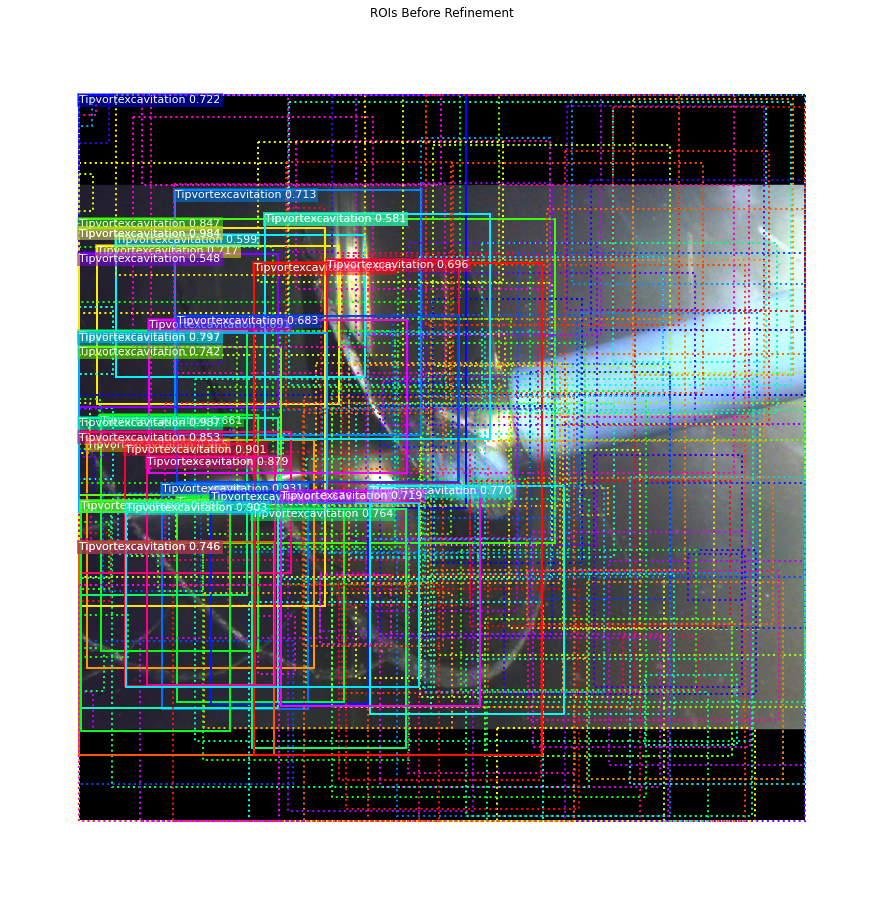

In [99]:
# Zeige eine zufällige Auswahl von Vorschlägen an.
# Als Hintergrund eingestufte Vorschläge sind gepunktet
# der Rest zeigt seine Klasse und sein Selbstvertrauen
# Bounding box und Wahrscheinlichkeit. Die Wahrscheinlichkeit ist dann Tipvortexcavitation 
# Die Wahrscheinlichkeit ist niedrig, dann handelt es sich um den Hintergrund.
# niedrig bedeutet, dass die Klasse nicht gefunden wird
limit = 200
ixs = np.random.randint(0, proposals.shape[0], limit)
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[ixs], roi_scores[ixs])]
visualize.draw_boxes(image, boxes=proposals[ixs],
                     visibilities=np.where(roi_class_ids[ixs] > 0, 2, 1),
                     captions=captions, title="ROIs Before Refinement",
                     ax=get_ax())

roi_bbox_specific        shape: (1000, 4)             min:   -2.65246  max:    3.35129  float32
refined_proposals        shape: (1000, 4)             min: -147.00000  max: 1236.00000  int32


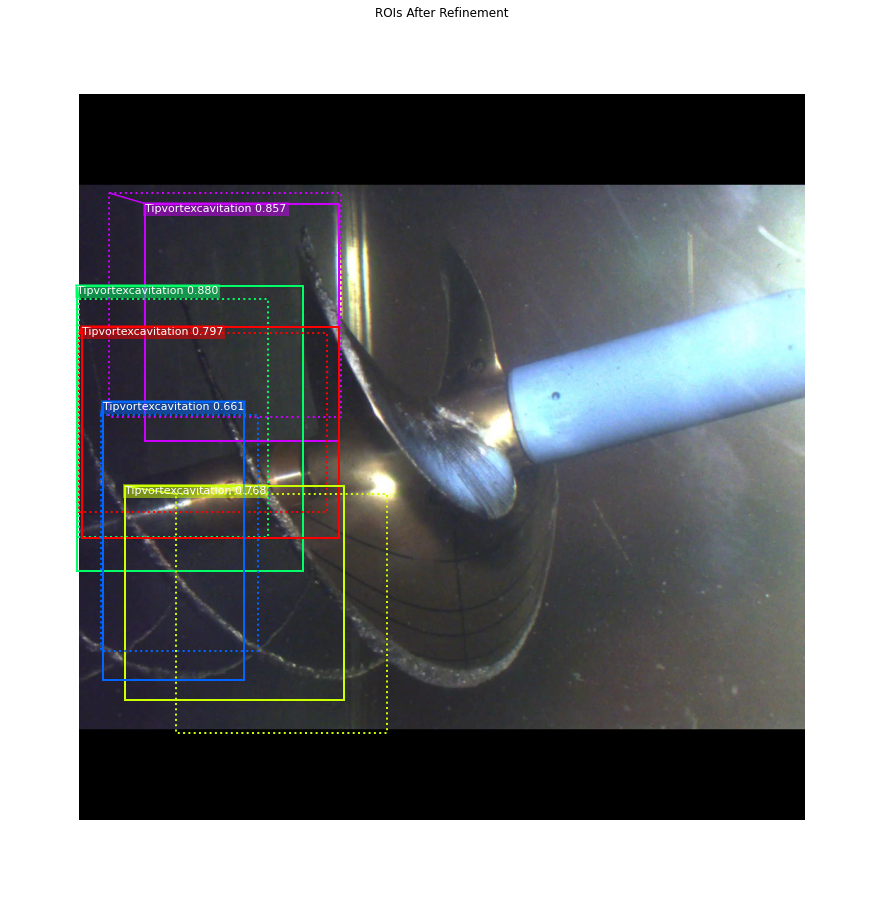

In [100]:
# Klassenspezifische Verschiebungen des Begrenzungsrahmens.
roi_bbox_specific = mrcnn["deltas"][0, np.arange(proposals.shape[0]), roi_class_ids]
log("roi_bbox_specific", roi_bbox_specific)


# Wenden Sie Begrenzungsrahmentransformationen an
# Shape: [N, (y1, x1, y2, x2)]
refined_proposals = utils.apply_box_deltas(
    proposals, roi_bbox_specific * config.BBOX_STD_DEV).astype(np.int32)
log("refined_proposals", refined_proposals)


# Zeige positive Vorschläge
# ids = np.arange(roi_boxes.shape[0])  # alle anzeigen
limit = 5
ids = np.random.randint(0, len(roi_positive_ixs), limit)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[roi_positive_ixs][ids], roi_scores[roi_positive_ixs][ids])]
visualize.draw_boxes(image, boxes=proposals[roi_positive_ixs][ids],
                     refined_boxes=refined_proposals[roi_positive_ixs][ids],
                     visibilities=np.where(roi_class_ids[roi_positive_ixs][ids] > 0, 1, 0),
                     captions=captions, title="ROIs After Refinement",
                     ax=get_ax())

In [101]:
# Als Hintergrund klassifizierte Kästchen entfernen
keep = np.where(roi_class_ids > 0)[0]
print("Keep {} detections:\n{}".format(keep.shape[0], keep))

Keep 163 detections:
[  0   1   2   3   5   6   8  13  15  16  17  19  21  23  24  25  26  27
  28  30  31  32  33  34  35  36  40  45  47  48  50  52  53  55  56  58
  60  61  63  64  66  68  70  71  72  73  75  77  78  82  83  84  85  88
  91  92  93  94  96  98  99 103 105 106 108 109 116 120 127 128 131 135
 140 141 146 153 154 155 156 157 158 159 160 164 166 176 177 179 181 184
 187 191 192 194 202 203 206 221 223 224 229 230 232 236 238 241 243 252
 258 260 273 274 282 285 288 297 304 308 315 316 347 349 358 363 364 373
 390 391 408 418 427 428 432 447 454 456 470 476 482 493 494 497 522 541
 562 572 602 607 698 709 730 747 748 757 764 774 775 779 780 787 876 961
 989]


In [102]:
# Entferne Erkennungen mit geringer Zuverlässigkeit(Konfidenz )
keep = np.intersect1d(keep, np.where(roi_scores >= config.DETECTION_MIN_CONFIDENCE)[0])
print("Remove boxes below {} confidence. Keep {}:\n{}".format(
    config.DETECTION_MIN_CONFIDENCE, keep.shape[0], keep))

Remove boxes below 0.7 confidence. Keep 114:
[  0   1   3   5   6   8  13  16  19  21  23  24  26  27  28  30  31  32
  34  35  36  40  45  47  52  53  56  58  60  61  63  64  66  68  70  71
  75  78  83  84  88  91  92  93  94  96  98  99 103 105 106 108 109 116
 127 128 131 140 146 153 154 155 156 158 160 164 176 177 184 187 191 202
 203 206 221 223 224 229 230 236 241 243 258 260 274 308 316 347 363 364
 390 391 408 418 427 428 454 493 494 522 562 572 602 607 698 709 730 747
 748 779 780 787 876 989]


In [103]:
# die Non-Max-Unterdrückung pro Klasse anwenden 
pre_nms_boxes = refined_proposals[keep]
pre_nms_scores = roi_scores[keep]
pre_nms_class_ids = roi_class_ids[keep]

nms_keep = []
for class_id in np.unique(pre_nms_class_ids):
    # Pick detections of this class
    # Erkennungen dieser Klasse auswählen 
    ixs = np.where(pre_nms_class_ids == class_id)[0]
    # NMS anwenden
    class_keep = utils.non_max_suppression(pre_nms_boxes[ixs], 
                                            pre_nms_scores[ixs],
                                            config.DETECTION_NMS_THRESHOLD)
    # Map indicies
    # Kartenindizes
    class_keep = keep[ixs[class_keep]]
    nms_keep = np.union1d(nms_keep, class_keep)
    print("{:22}: {} -> {}".format(dataset.class_names[class_id][:20], 
                                   keep[ixs], class_keep))

keep = np.intersect1d(keep, nms_keep).astype(np.int32)
print("\nKept after per-class NMS: {}\n{}".format(keep.shape[0], keep))

Tipvortexcavitation   : [  0   1   3   5   6   8  13  16  19  21  23  24  26  27  28  30  31  32
  34  35  36  40  45  47  52  53  56  58  60  61  63  64  66  68  70  71
  75  78  83  84  88  91  92  93  94  96  98  99 103 105 106 108 109 116
 127 128 131 140 146 153 154 155 156 158 160 164 176 177 184 187 191 202
 203 206 221 223 224 229 230 236 241 243 258 260 274 308 316 347 363 364
 390 391 408 418 427 428 454 493 494 522 562 572 602 607 698 709 730 747
 748 779 780 787 876 989] -> [347 223 493 989 202  32 106 203 747]

Kept after per-class NMS: 9
[ 32 106 202 203 223 347 493 747 989]


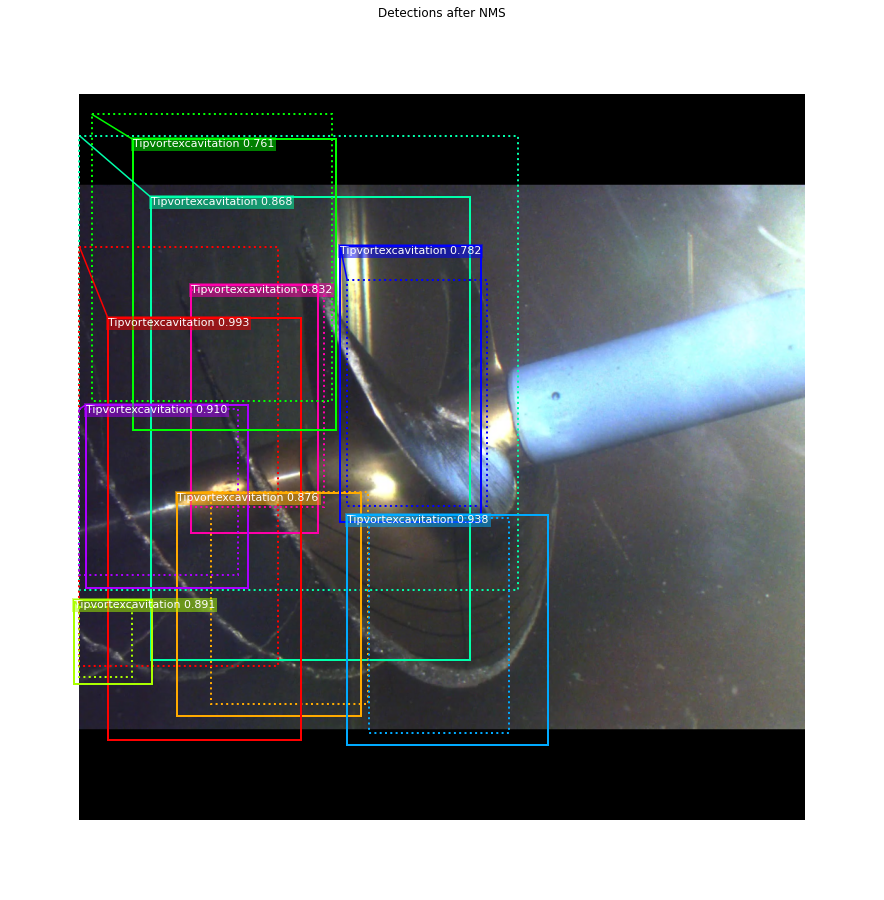

In [104]:
# Endgültige Erkennungen anzeigen
ixs = np.arange(len(keep))  # Display all
# ixs = np.random.randint(0, len(keep), 10)  # zufällige Probe anzeigen
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[keep][ixs], roi_scores[keep][ixs])]
visualize.draw_boxes(
    image, boxes=proposals[keep][ixs],
    refined_boxes=refined_proposals[keep][ixs],
    visibilities=np.where(roi_class_ids[keep][ixs] > 0, 1, 0),
    captions=captions, title="Detections after NMS",
    ax=get_ax())

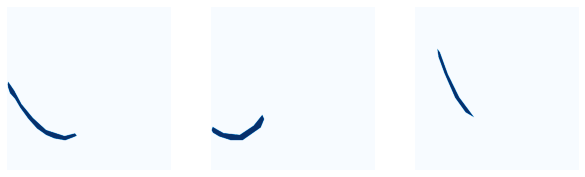

In [105]:
display_images(np.transpose(gt_mask, [2, 0, 1]), cmap="Blues")

In [106]:
# Die Vorhersagen Über die Maske erhalten
mrcnn = model.run_graph([image], [
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
])

# Erkennungen erhalten class IDs. Schneide die Zeros von dem Padding 
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

detections               shape: (1, 100, 6)           min:    0.00000  max:    1.00000  float32
masks                    shape: (1, 100, 28, 28, 2)   min:    0.00001  max:    0.64014  float32
8 detections: ['Tipvortexcavitation' 'Tipvortexcavitation' 'Tipvortexcavitation'
 'Tipvortexcavitation' 'Tipvortexcavitation' 'Tipvortexcavitation'
 'Tipvortexcavitation' 'Tipvortexcavitation']


In [107]:
# Masken
det_boxes = utils.denorm_boxes(mrcnn["detections"][0, :, :4], image.shape[:2])
det_mask_specific = np.array([mrcnn["masks"][0, i, :, :, c] 
                              for i, c in enumerate(det_class_ids)])
det_masks = np.array([utils.unmold_mask(m, det_boxes[i], image.shape)
                      for i, m in enumerate(det_mask_specific)])
log("det_mask_specific", det_mask_specific)
log("det_masks", det_masks)

det_mask_specific        shape: (8, 28, 28)           min:    0.00001  max:    0.64014  float32
det_masks                shape: (8, 1024, 1024)       min:    0.00000  max:    1.00000  bool


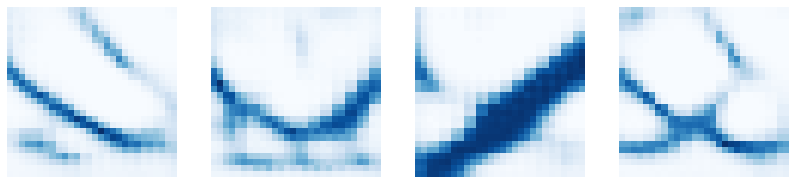

In [108]:
display_images(det_mask_specific[:4] * 255, cmap="Blues", interpolation="none")

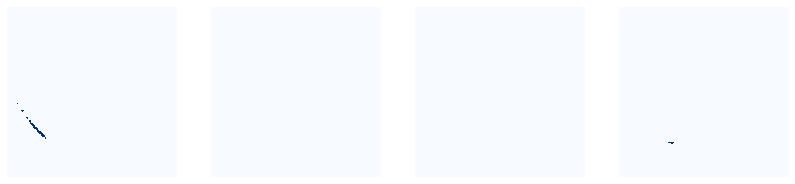

In [110]:
display_images(det_masks[:4] * 255, cmap="Blues", interpolation="none")